In [10]:
from GPGO import GP, RBF
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

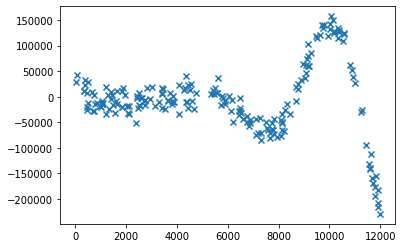

In [32]:
x=np.random.uniform(0,1.2,200)[:,None]

def f(X):
    return (6 * X - 2) ** 2 * np.sin(12 * X - 4) - X

def noise(x, alpha=1):
    return f(x) + np.random.randn(*x.shape) * alpha

y = noise(x, alpha=1.5)

X,Y=x*10000,y*10000
plt.scatter(X,Y, marker="x")

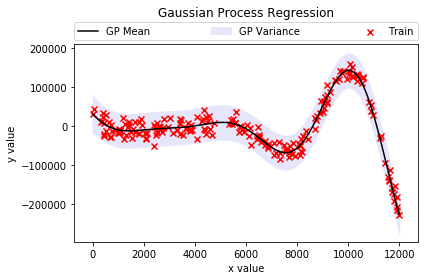

(3.8768669409510554, 1860.30997430694, 0.31000468337523907)

In [33]:
gp =GP(X,Y, kernel=RBF(gradient=False), normalize_y=True)
gp.optimize(n_restarts=10)

plot = np.linspace(0,12000,1000)[:,None]
gp.plot(plot)
gp.get_kernel().gethyper()

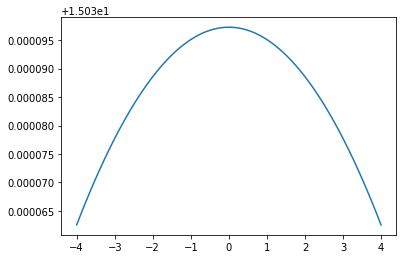

In [34]:
gp.get_kernel().plot()

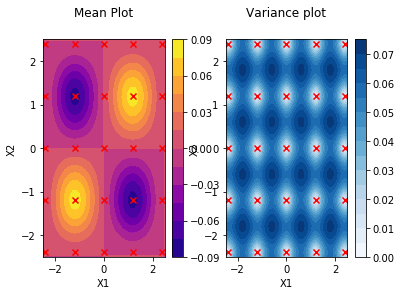

In [29]:
from GPGO.GaussianProcess import generate_grid
dim=2
X = generate_grid(dim, 5, [[-2.4,2.4] for i in range(dim)])
Y = ((X[:, 1] * X[:, 0])/ np.exp((X[:, 1] ** 2 + X[:, 0] ** 2))) [:, None]
gp = GP(X, Y, kernel=RBF())

gp.set_boundary([[1e-4,1]])
gp.optimize(n_restarts=5)

plot = generate_grid(dim, 50, [[-2.5,2.5] for i in range(dim)])
gp.plot(plot)

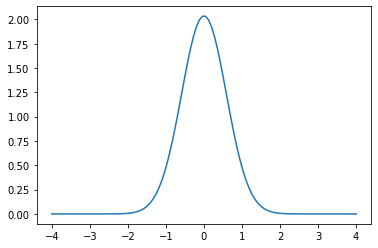

In [30]:
gp.get_kernel().plot()